# Stock Price Prediction by using LSTM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import pandas_datareader as wb

C:\Users\91938\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [6]:
import datetime
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2019,1,1)

In [7]:
df=wb.DataReader('JPM','yahoo',start,end)

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,42.130001,41.450001,41.619999,41.669998,20143100.0,31.686729
2010-01-04,42.990002,41.669998,41.790001,42.849998,35460500.0,32.623146
2010-01-05,43.840000,42.779999,42.790001,43.680000,41208300.0,33.255066
2010-01-06,44.090000,43.310001,43.450001,43.919998,27729000.0,33.437775
2010-01-07,45.119999,43.610001,43.790001,44.790001,44864700.0,34.100143


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2265 non-null   float64
 1   Low        2265 non-null   float64
 2   Open       2265 non-null   float64
 3   Close      2265 non-null   float64
 4   Volume     2265 non-null   float64
 5   Adj Close  2265 non-null   float64
dtypes: float64(6)
memory usage: 123.9 KB


In [10]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
returns=df.copy()

In [12]:
returns['return']=df['Close'].pct_change()

# EDA

In [13]:
returns.head()

,High,Low,Open,Close,Volume,Adj Close,return
Date,,,,,,,
2009-12-31,42.130001,41.450001,41.619999,41.669998,20143100.0,31.686729,NaN
2010-01-04,42.990002,41.669998,41.790001,42.849998,35460500.0,32.623146,0.028318
2010-01-05,43.840000,42.779999,42.790001,43.680000,41208300.0,33.255066,0.019370
2010-01-06,44.090000,43.310001,43.450001,43.919998,27729000.0,33.437775,0.005494
2010-01-07,45.119999,43.610001,43.790001,44.790001,44864700.0,34.100143,0.019809


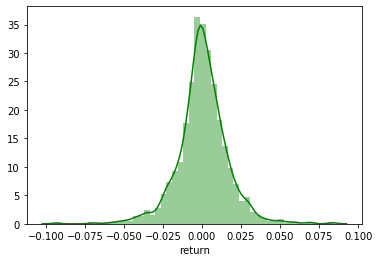

In [14]:
sns.distplot(returns['return'],bins=50,color='green',kde=True)

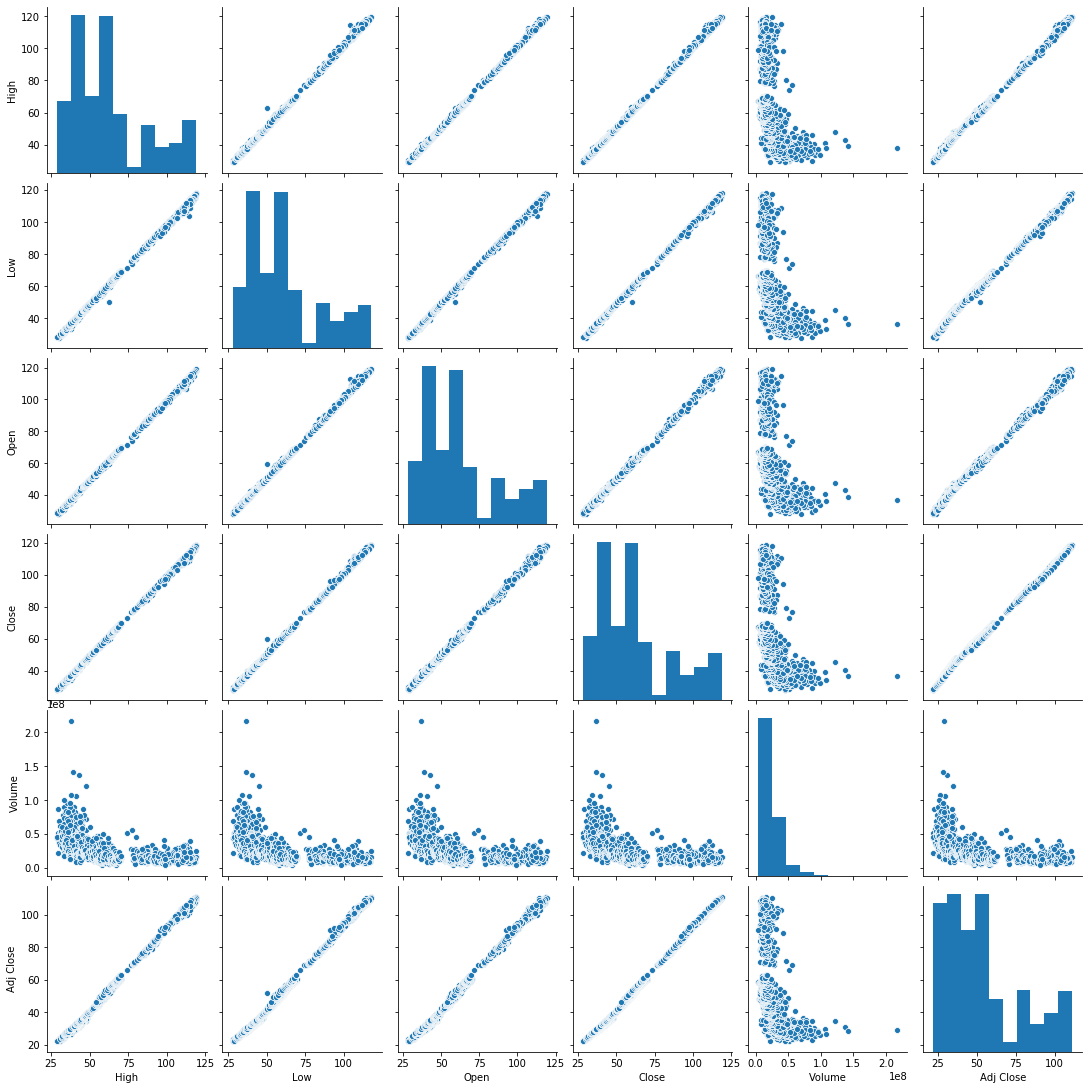

In [15]:
sns.pairplot(df,palette='Set2')

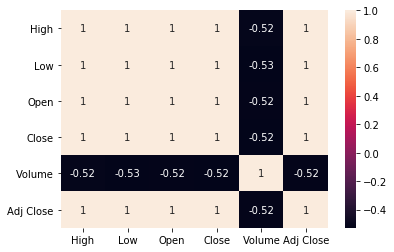

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.idxmax()

High        2018-02-27
Low         2018-09-20
Open        2018-09-21
Close       2018-02-26
Volume      2012-05-11
Adj Close   2018-09-20
dtype: datetime64[ns]

In [18]:
df.idxmin()

High        2011-11-29
Low         2011-10-04
Open        2011-10-04
Close       2011-11-23
Volume      2017-11-24
Adj Close   2011-11-23
dtype: datetime64[ns]

In [19]:
def funplot(feature):
    df[feature].plot(figsize=(12,6),label=feature)
    plt.xlabel('year')
    plt.ylabel(feature)
    plt.legend()

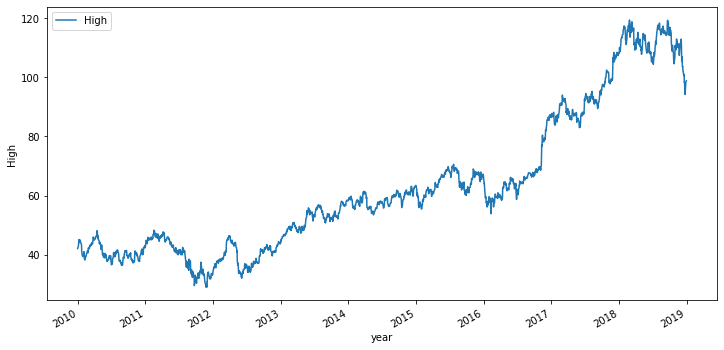

In [20]:
funplot('High')

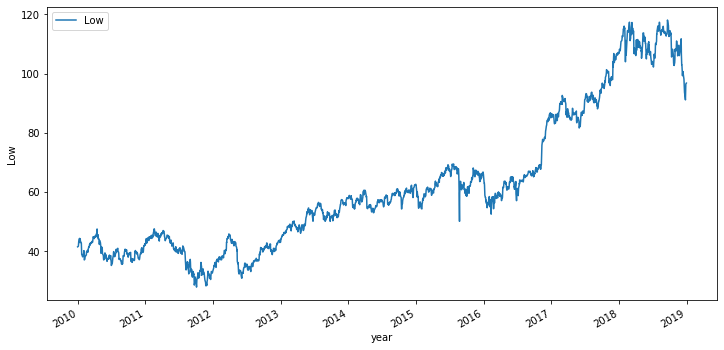

In [21]:
funplot('Low')

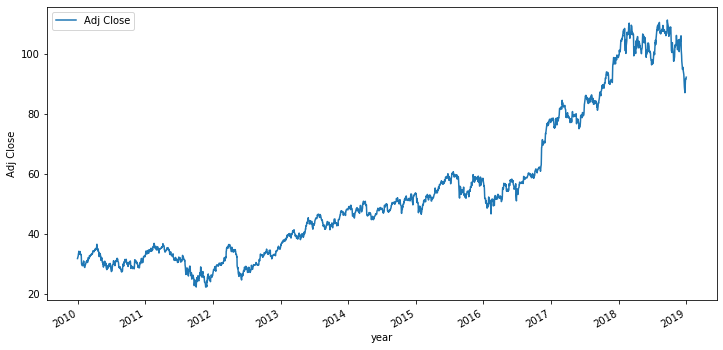

In [22]:
funplot('Adj Close')

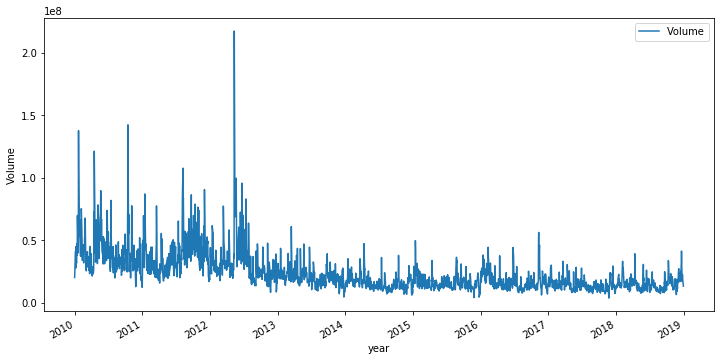

In [23]:
funplot('Volume')

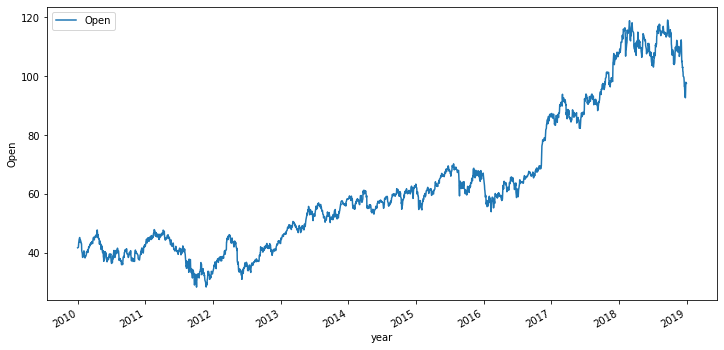

In [24]:
funplot('Open')

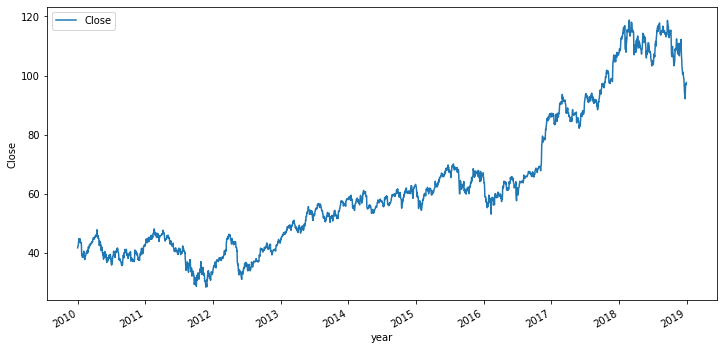

In [25]:
funplot('Close')

In [26]:
import plotly as py
import cufflinks as cf
cf.go_offline()

In [27]:
df['Adj Close'].iplot()

# Train Test Score

In [28]:
l=len(df['Close'])
train_data_length=l*0.8

In [29]:

x = df['Close'].values.reshape(-1, 1)

In [30]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(x)

In [31]:
scaled_data

array([[0.14702953],
       [0.16008408],
       [0.16926653],
       ...,
       [0.75959734],
       [0.75727409],
       [0.766014  ]])

In [32]:
X_train=[]
y_train=[]
for i in range(60,l):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i])

In [33]:
X_train[0]

array([0.14702953, 0.16008408, 0.16926653, 0.17192167, 0.18154666,
       0.1803297 , 0.17867021, 0.16716454, 0.17557253, 0.18044031,
       0.16926653, 0.16484124, 0.16616885, 0.13452818, 0.11926099,
       0.11981414, 0.11129549, 0.12114175, 0.1228012 , 0.11682708,
       0.12446069, 0.13463879, 0.13176239, 0.11029981, 0.10974666,
       0.10310877, 0.11074234, 0.11605266, 0.11771215, 0.11693774,
       0.12932848, 0.12899659, 0.13308995, 0.12888594, 0.13795773,
       0.12722649, 0.13795773, 0.13563448, 0.15034852, 0.14879968,
       0.14647638, 0.14548069, 0.14979532, 0.15964158, 0.15720767,
       0.15532691, 0.16096915, 0.16373494, 0.16340306, 0.16251799,
       0.16439875, 0.17048348, 0.16882399, 0.166722  , 0.16993033,
       0.1792234 , 0.18320611, 0.18320611, 0.18409118, 0.18232107])

In [34]:
y_train[0]

array([0.1792234])

In [35]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [36]:
y_train.shape

(2205, 1)

In [37]:
X_train.shape

(2205, 60)

In [38]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

# Neural Network LSTM model

In [63]:
model=Sequential()

In [40]:
model.add(LSTM(16, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=False))
model.add(Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [42]:

model.compile(loss='mean_squared_error', optimizer='adam')
history_model = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
2205/2205 [==============================] - 20s 9ms/sample - loss: 0.0034
Epoch 2/20
2205/2205 [==============================] - 15s 7ms/sample - loss: 0.0018
Epoch 3/20
2205/2205 [==============================] - 16s 7ms/sample - loss: 0.0012
Epoch 4/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 0.0010
Epoch 5/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 8.1028e-04
Epoch 6/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 6.7205e-04
Epoch 7/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 5.8122e-040s - 
Epoch 8/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 5.2452e-04
Epoch 9/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 4.8601e-04
Epoch 10/20
2205/2205 [==============================] - 17s 8ms/sample - loss: 4.5805e-04
Epoch 11/20
2205

# Error Calculation

In [44]:
X_test=[]

In [45]:
for i in range(int(train_data_length),len(scaled_data)):
    X_test.append(scaled_data[i-60:i,0])

In [46]:
X_test[0]

array([0.63745992, 0.62573299, 0.63115392, 0.64332339, 0.6457573 ,
       0.64730614, 0.64907629, 0.64996128, 0.64299151, 0.63624297,
       0.64066825, 0.65106766, 0.64752745, 0.63867688, 0.63878753,
       0.6394513 , 0.64221709, 0.64940817, 0.64011506, 0.64520411,
       0.61035519, 0.61466982, 0.6075894 , 0.61168271, 0.61212525,
       0.62329908, 0.6377918 , 0.6457573 , 0.64774868, 0.6377918 ,
       0.62230335, 0.62584356, 0.62186081, 0.65051447, 0.64597853,
       0.64542542, 0.63701739, 0.65073569, 0.64852309, 0.66124576,
       0.67684478, 0.68823984, 0.68757607, 0.68425717, 0.69288643,
       0.69343954, 0.69421396, 0.68536347, 0.68646977, 0.6885718 ,
       0.72154001, 0.70538779, 0.71268952, 0.70295388, 0.69731172,
       0.69509903, 0.69908178, 0.69587345, 0.69675853, 0.69841802])

In [47]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [48]:
X_test.shape

(453, 60)

In [50]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [51]:
X_test.shape

(453, 60, 1)

In [52]:
predictions=model.predict(X_test)

In [53]:
predictions=scaler.inverse_transform(predictions)

In [61]:
y_test=np.array(df['Close'][int(train_data_length):])
rms=np.sqrt(np.mean((predictions-y_test)**2))

In [62]:
rms
#root mean squared error

13.002170825189244

# Conclusion 

In [65]:
pred_data=pd.DataFrame(predictions,columns=['Close'])


In [66]:
train=df['Close'][:int(train_data_length)]

In [67]:
train=pd.DataFrame(train,columns=['Close'])

In [68]:
pre_res=pd.concat([train,pred_data],ignore_index=True)

In [69]:
pre_res.index=df.index

In [74]:
pre_res.tail()

,Close
Date,
2018-12-24,97.414032
2018-12-26,96.480179
2018-12-27,96.348000
2018-12-28,96.373604
2018-12-31,96.347008


In [75]:
df['Close'].tail()

Date
2018-12-24    92.139999
2018-12-26    95.959999
2018-12-27    97.040001
2018-12-28    96.830002
2018-12-31    97.620003
Name: Close, dtype: float64

Text(0.5, 1.0, 'Closing Value of JPMC')

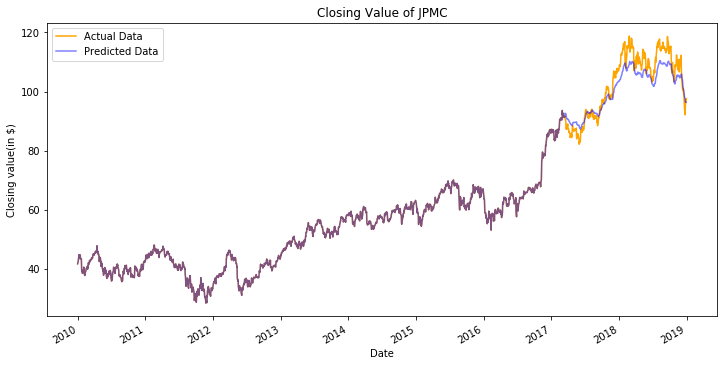

In [83]:
plt.figure(figsize=(12,6))
df['Close'].plot(color='orange',label='Actual Data')
pre_res['Close'].plot(color='blue',label='Predicted Data',alpha=0.5)
plt.legend(loc='upper left')
plt.ylabel('Closing value(in $)')
plt.title('Closing Value of JPMC')